In [3]:
import re
import csv

t = open('/home/faculty/millbr02/pub/un-debates-augmented-1.csv','r',encoding='latin-1')
csv_iter = csv.reader(t)
list_1 = []
db = []
for row in csv_iter:
        db.append(row)
        list_1.append(row[4])



In [4]:
import psycopg2
conn = psycopg2.connect("postgresql://millbr02:@localhost/world")
curs = conn.cursor()
curs.execute("select * from country limit 400")
res = curs.fetchall()
dict_1 = {}
for row in res:
    list_1.append(row[1])
    

In [5]:

matrix_1 = {x: {} for x in list_1}
for k in matrix_1:
    matrix_1[k] = {x:0 for x in list_1}

In [ ]:
for row in db[1:]:
    speech = row[3]
    countryspeaking = row[4]
    for word in list_1:
        count = speech.count(word)
        matrix_1[countryspeaking][word] += count

In [2]:
print(matrix_1['United States'])

NameError: name 'matrix_1' is not defined

NameError: name 'matrix_1' is not defined

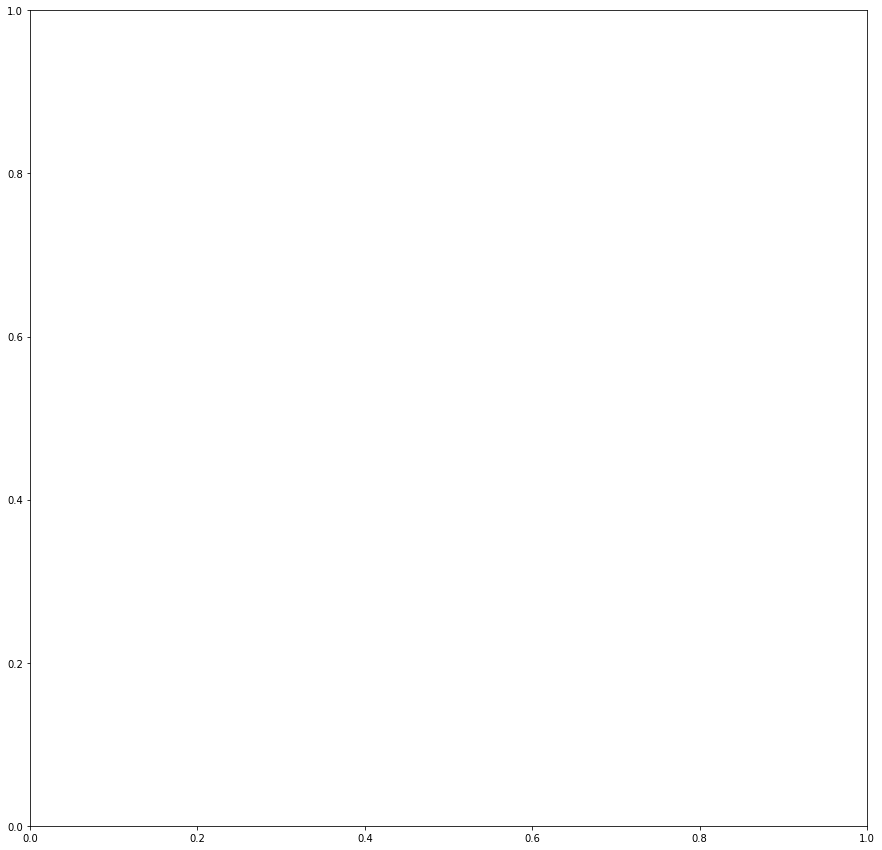

In [1]:
%matplotlib inline
import networkx as nx
import warnings
import matplotlib.pyplot as plt
gfig, gax = plt.subplots(figsize = (15, 15))
warnings.filterwarnings('ignore')
g = nx.Graph()

g.add_nodes_from(matrix_1) 
for key in matrix_1: 
    for key2 in matrix_1[key]: 
        if matrix_1[key][key2] > 100:
            g.add_edge(key, key2) 



pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, font_size=15, node_color = "blue", iterations = 5000)